## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import keras
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [0]:

x_train.shape[0]

60000

In [0]:
x_test.shape[0]

10000

### Find dimensions of an image in the dataset

In [0]:
pd.value_counts(y_train)


9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
num_classes = 10

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)


In [0]:
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model2 = Sequential()

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model2.fit(x_train, y_train, batch_size=500, nb_epoch=1, 
          validation_data=(x_test, y_test), callbacks=callback_list)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 60000 samples, validate on 10000 samples
Epoch 1/1





60000/60000 [==============================] - 4s 59us/step - loss: 0.5000 - acc: 0.8255 - val_loss: 0.3647 - val_acc: 0.8708


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
# Deine Model
model3 = Sequential()

# 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

# 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model3.add(Dropout(0.25))

# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))

# More Dropout
model3.add(Dropout(0.5))

# Prediction Layer
model3.add(Dense(10))
model3.add(Activation('softmax'))

# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model3.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
          validation_data=(x_test, y_test), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.5046 - acc: 0.8186 - val_loss: 0.3184 - val_acc: 0.8863
Epoch 2/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.3349 - acc: 0.8796 - val_loss: 0.2804 - val_acc: 0.8961
Epoch 3/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.2902 - acc: 0.8946 - val_loss: 0.2463 - val_acc: 0.9088
Epoch 4/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.2622 - acc: 0.9032 - val_loss: 0.2368 - val_acc: 0.9105
Epoch 5/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.2364 - acc: 0.9128 - val_loss: 0.2231 - val_acc: 0.9178
Epoch 6/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.2215 - acc: 0.9194 - val_loss: 0.2355 - val_acc: 0.9141
Epoch 7/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.2084 - acc: 0.9223 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

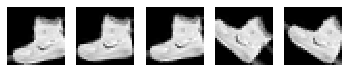

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
# Deine Model
model4 = Sequential()

# 1st Conv Layer
model4.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model4.add(Activation('relu'))

# 2nd Conv Layer
model4.add(Convolution2D(32, 3, 3))
model4.add(Activation('relu'))

# Max Pooling
model4.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model4.add(Dropout(0.25))

# Fully Connected Layer
model4.add(Flatten())
model4.add(Dense(128))
model4.add(Activation('relu'))

# More Dropout
model4.add(Dropout(0.5))

# Prediction Layer
model4.add(Dense(10))
model4.add(Activation('softmax'))

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

#Loss and Optimizer
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit_Generator
model4.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validat

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.9996 - acc: 0.6301 - val_loss: 0.5958 - val_acc: 0.7727
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7519 - acc: 0.7185 - val_loss: 0.5354 - val_acc: 0.7940
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6824 - acc: 0.7436 - val_loss: 0.5498 - val_acc: 0.7954
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6463 - acc: 0.7577 - val_loss: 0.4981 - val_acc: 0.8228
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6157 - acc: 0.7691 - val_loss: 0.4812 - val_acc: 0.8248
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5987 - acc: 0.7763 - val_loss: 0.4601 - val_acc: 0.8319
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5800 - acc: 0.7849 - val_loss: 0.4446 - val_acc: 0.8383
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [0]:
model4.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 66us/step


[0.4334593547821045, 0.8434]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### **Load CIFAR10 dataset**

In [0]:
%matplotlib inline
# Load/Prep the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [0]:
x_train = x_train.reshape(x_train.shape[0], 32,32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

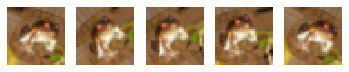

In [0]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()